In [1]:
import time
import math
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
import numpy as np
import pandas as pd
import sklearn.preprocessing as prep

Using TensorFlow backend.
/home/bardia/.virtualenvs/Jupyter/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/bardia/.virtualenvs/Jupyter/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
df = pd.read_csv('/home/bardia/Documents/University/Seventh Semester/Principles of Computational Intelligence/stock project/tmp/csv/IRO1ABAD0001.csv-edited')
df.head()

,قیمت روز قبل,بیشترین,کمترین,حجم,مقدار آخرین قیمت
0,2028.0,1968.0,1968.0,0.000010,1968.0
1,2028.0,1968.0,1498.0,0.105300,1968.0
2,1809.0,1755.0,1755.0,0.000646,1755.0
3,1809.0,1755.0,1755.0,0.001000,1755.0
4,1809.0,1755.0,1755.0,0.113000,1755.0


In [4]:
def standard_scaler(X_train, X_test):
    train_samples, train_nx, train_ny = X_train.shape
    test_samples, test_nx, test_ny = X_test.shape
    
    X_train = X_train.reshape((train_samples, train_nx * train_ny))
    X_test = X_test.reshape((test_samples, test_nx * test_ny))
    
    preprocessor = prep.StandardScaler().fit(X_train)
    X_train = preprocessor.transform(X_train)
    X_test = preprocessor.transform(X_test)
    
    X_train = X_train.reshape((train_samples, train_nx, train_ny))
    X_test = X_test.reshape((test_samples, test_nx, test_ny))
    
    return X_train, X_test

Split the data to X_train, y_train, X_test, y_test

In [5]:
def preprocess_data(stock, seq_len):
    amount_of_features = len(stock.columns)
    data = stock.values
    
    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index : index + sequence_length])
        
    result = np.array(result)
    row = round(0.9 * result.shape[0])
    train = result[: int(row), :]
    
    train, result = standard_scaler(train, result)
    
    X_train = train[:, : -1]
    y_train = train[:, -1][: ,-1]
    X_test = result[int(row) :, : -1]
    y_test = result[int(row) :, -1][ : ,-1]

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], amount_of_features))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], amount_of_features))  

    return [X_train, y_train, X_test, y_test]

In [6]:
def build_model(layers):
    model = Sequential()

    # By setting return_sequences to True we are able to stack another LSTM layer
    model.add(LSTM(
        input_dim=layers[0],
        output_dim=layers[1],
        return_sequences=True))
    model.add(Dropout(0.4))

    model.add(LSTM(
        layers[2],
        return_sequences=False))
    model.add(Dropout(0.3))

    model.add(Dense(
        output_dim=layers[3]))
    model.add(Activation("linear"))

    start = time.time()
    model.compile(loss="mse", optimizer="rmsprop", metrics=['accuracy'])
    print("Compilation Time : ", time.time() - start)
    return model

In [81]:
window = 20
X_train, y_train, X_test, y_test = preprocess_data(df[:: -1], window)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (1585, 20, 5)
y_train (1585,)
X_test (176, 20, 5)
y_test (176,)


In [90]:
model = build_model([X_train.shape[2], window, 100, 1])

/home/bardia/.virtualenvs/Jupyter/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
/home/bardia/.virtualenvs/Jupyter/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 5), units=20)`
  


Compilation Time :  0.02759528160095215


/home/bardia/.virtualenvs/Jupyter/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


In [95]:
model.fit(
    X_train,
    y_train,
    batch_size=150,
    epochs=40,
    validation_split=0.2,
    verbose=1)

Train on 1268 samples, validate on 317 samples
Epoch 1/40
1268/1268 [==============================] - 1s 496us/step - loss: 0.0157 - acc: 0.0000e+00 - val_loss: 0.0103 - val_acc: 0.0000e+00
Epoch 2/40
1268/1268 [==============================] - 1s 456us/step - loss: 0.0203 - acc: 0.0000e+00 - val_loss: 0.0056 - val_acc: 0.0000e+00
Epoch 3/40
1268/1268 [==============================] - 1s 455us/step - loss: 0.0182 - acc: 0.0000e+00 - val_loss: 0.0048 - val_acc: 0.0000e+00
Epoch 4/40
1268/1268 [==============================] - 1s 455us/step - loss: 0.0175 - acc: 0.0000e+00 - val_loss: 0.0059 - val_acc: 0.0000e+00
Epoch 5/40
1268/1268 [==============================] - 1s 458us/step - loss: 0.0207 - acc: 0.0000e+00 - val_loss: 0.0049 - val_acc: 0.0000e+00
Epoch 6/40
1268/1268 [==============================] - 1s 451us/step - loss: 0.0173 - acc: 0.0000e+00 - val_loss: 0.0046 - val_acc: 0.0000e+00
Epoch 7/40
1268/1268 [==============================] - 1s 463us/step - loss: 0.0167 - ac

In [96]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))

Train Score: 0.01 MSE (0.08 RMSE)
Test Score: 0.01 MSE (0.10 RMSE)


In [72]:
diff = []
ratio = []
pred = model.predict(X_test)
for u in range(len(y_test)):
    pr = pred[u][0]
    ratio.append((y_test[u] / pr) - 1)
    diff.append(abs(y_test[u] - pr))

In [73]:
# TODO: Scale it back

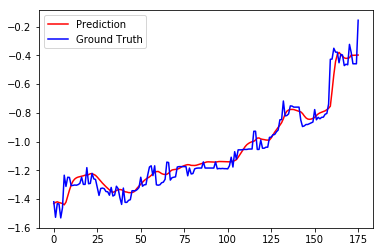

In [74]:
# if using within a jupyter notebook
%matplotlib inline 

import matplotlib
import matplotlib.pyplot as plt

plt.plot(pred, color='red', label='Prediction')
plt.plot(y_test, color='blue', label='Ground Truth')
plt.legend(loc='upper left')
plt.show()